In [1]:
import pandas as pd
import numpy as np

In [2]:
filename='weatherAUS.csv'

In [3]:
df=pd.read_csv(filename)
#df
len(df)

145460

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df= df.dropna()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [7]:
binary_columns = ['RainToday', 'RainTomorrow']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

c:\Python310\lib\site-packages\sklearn\utils\__init__.py:22: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.2)
  from scipy.sparse import issparse


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int32  
 1   Location       56420 non-null  int32  
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  int32  
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  int32  
 10  WindDir3pm     56420 non-null  int32  
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

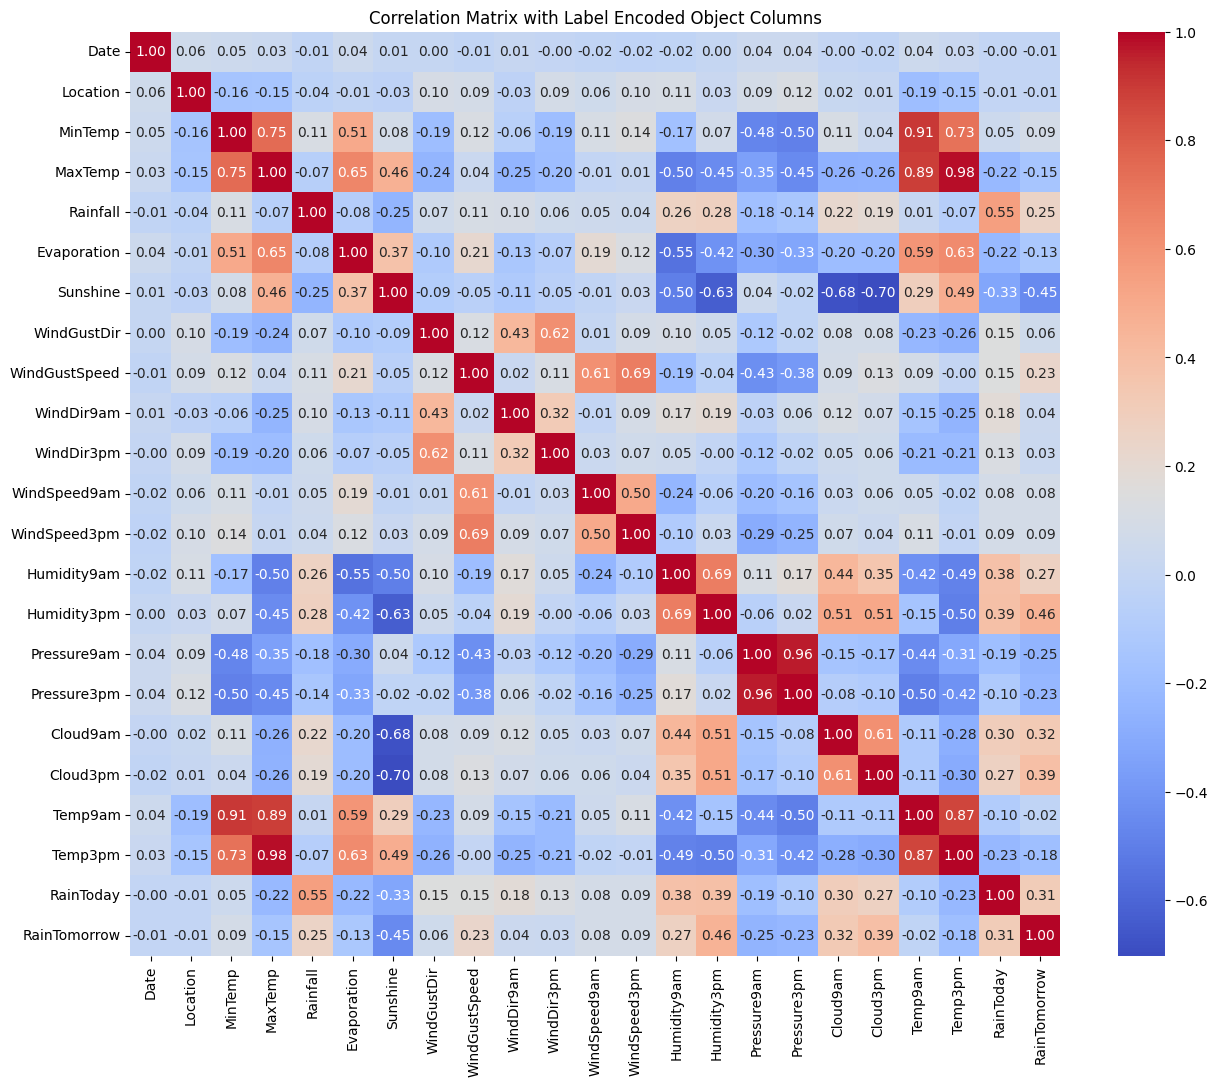

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
correlation_matrix = df.corr()

# Plot the heatmap for visualization
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Label Encoded Object Columns")
plt.show()

In [11]:
df=df.drop("Date",axis=1)
df=df.drop("Location",axis=1)

In [12]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,9.0,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


Rain Tomorrow Prediction Results:


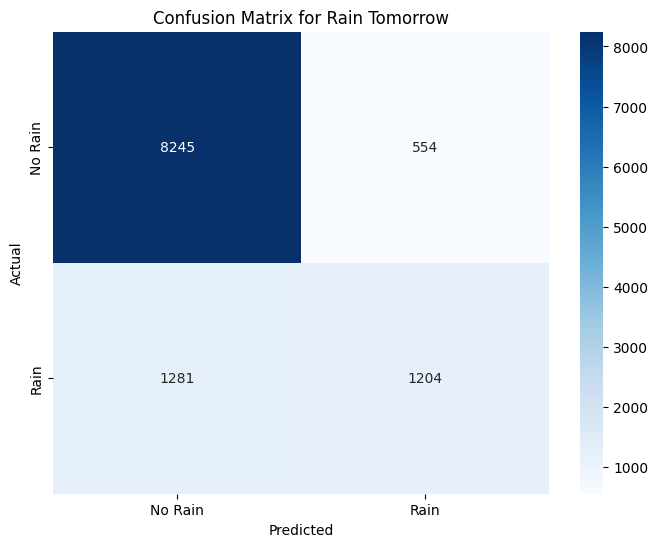

Accuracy for Rain Tomorrow: 0.8374


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X = df[features]

y_tomorrow = df['RainTomorrow']  
X_train, X_test, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.2, random_state=42)

rf_tomorrow = RandomForestClassifier(random_state=42)


rf_tomorrow.fit(X_train, y_train_tomorrow)

y_pred_tomorrow = rf_tomorrow.predict(X_test)

print("Rain Tomorrow Prediction Results:")



conf_matrix_tomorrow = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tomorrow, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix for Rain Tomorrow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_tomorrow = accuracy_score(y_test_tomorrow, y_pred_tomorrow)
print(f'Accuracy for Rain Tomorrow: {accuracy_tomorrow:.4f}')


Rain Tomorrow Prediction Results:


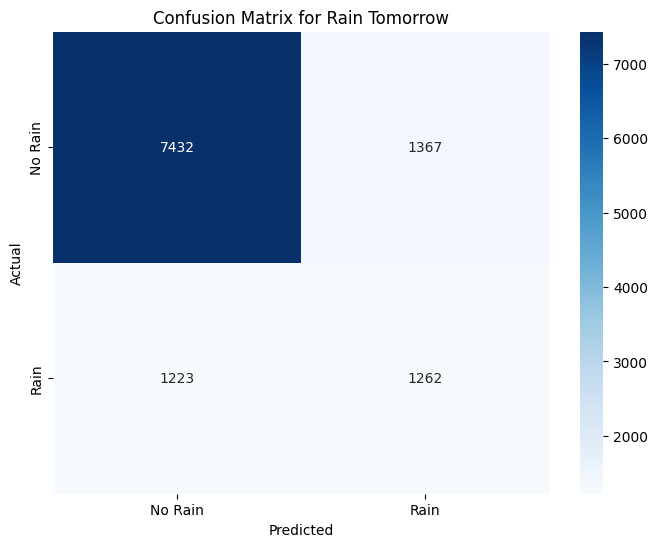

Accuracy for Rain Tomorrow: 0.77


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


features = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X = df[features]

y_tomorrow = df['RainTomorrow']  
X_train, X_test, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.2, random_state=42)


decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train_tomorrow)

y_pred_tomorrow = decision_tree.predict(X_test)

print("Rain Tomorrow Prediction Results:")

conf_matrix_tomorrow = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tomorrow, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix for Rain Tomorrow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_tomorrow = accuracy_score(y_test_tomorrow, y_pred_tomorrow)
print(f'Accuracy for Rain Tomorrow: {accuracy_tomorrow:.2f}')


Rain Tomorrow Prediction Results:


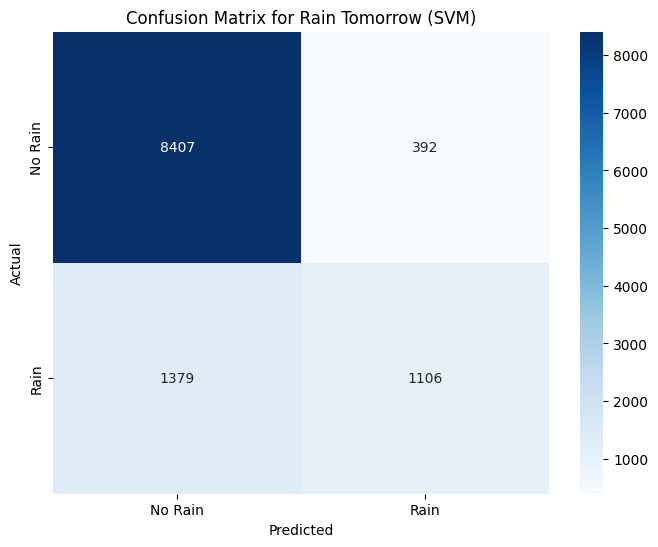

Accuracy for Rain Tomorrow: 0.8431


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X = df[features]

y_tomorrow = df['RainTomorrow']  
X_train, X_test, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train_tomorrow)

y_pred_tomorrow = svm_model.predict(X_test)

print("Rain Tomorrow Prediction Results:")

conf_matrix_tomorrow = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tomorrow, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix for Rain Tomorrow (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_tomorrow = accuracy_score(y_test_tomorrow, y_pred_tomorrow)
print(f'Accuracy for Rain Tomorrow: {accuracy_tomorrow:.4f}')


Rain Tomorrow Prediction Results:
[[7710 1089]
 [1004 1481]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8799
           1       0.58      0.60      0.59      2485

    accuracy                           0.81     11284
   macro avg       0.73      0.74      0.73     11284
weighted avg       0.82      0.81      0.82     11284



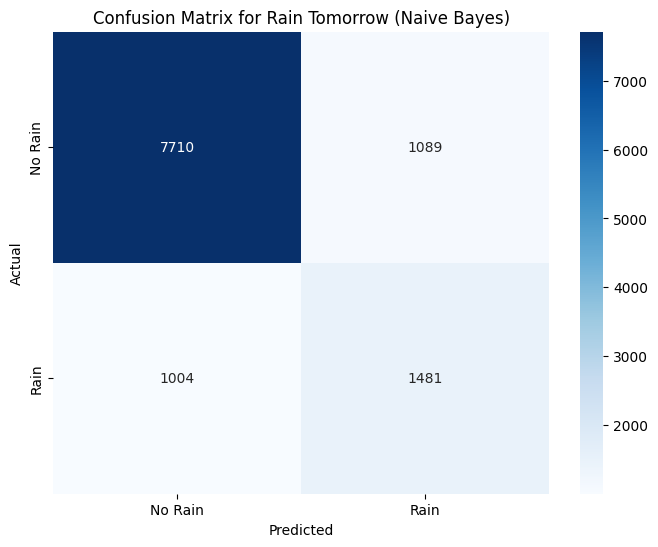

Accuracy for Rain Tomorrow: 0.8145


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


features = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X = df[features]
y_tomorrow = df['RainTomorrow']  
X_train, X_test, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.2, random_state=42)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train_tomorrow)


y_pred_tomorrow = naive_bayes_model.predict(X_test)


print("Rain Tomorrow Prediction Results:")
print(confusion_matrix(y_test_tomorrow, y_pred_tomorrow))
print(classification_report(y_test_tomorrow, y_pred_tomorrow))

conf_matrix_tomorrow = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tomorrow, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix for Rain Tomorrow (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_tomorrow = accuracy_score(y_test_tomorrow, y_pred_tomorrow)
print(f'Accuracy for Rain Tomorrow: {accuracy_tomorrow:.4f}')


[0 0 1 ... 0 0 0]
Rain Tomorrow Prediction Results:


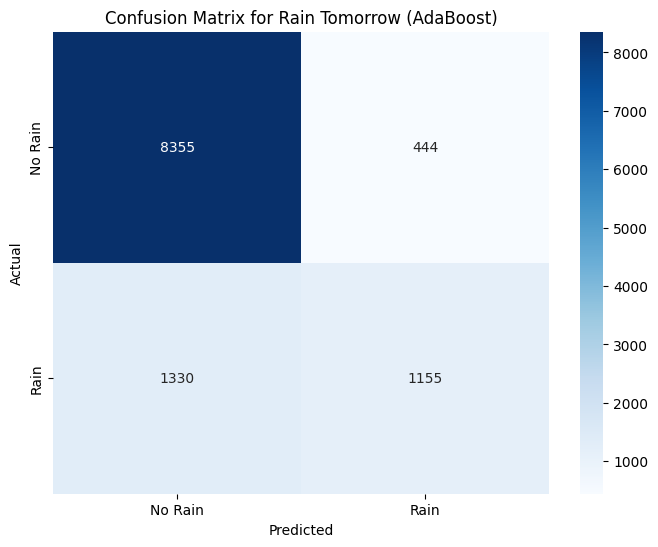

Accuracy for Rain Tomorrow: 0.8428


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



features = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X = df[features]


y_tomorrow = df['RainTomorrow']  
X_train, X_test, y_train_tomorrow, y_test_tomorrow = train_test_split(X, y_tomorrow, test_size=0.2, random_state=42)


base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)


adaboost_model.fit(X_train, y_train_tomorrow)


y_pred_tomorrow = adaboost_model.predict(X_test)
print(y_pred_tomorrow)

print("Rain Tomorrow Prediction Results:")

conf_matrix_tomorrow = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tomorrow, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix for Rain Tomorrow (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


accuracy_tomorrow = accuracy_score(y_test_tomorrow, y_pred_tomorrow)
print(f'Accuracy for Rain Tomorrow: {accuracy_tomorrow:.4f}')


In [18]:
a=[8.6,98,92,49,8,6]
a=np.array(a).reshape(1,-1)

ans=adaboost_model.predict(a)
print(ans)


[1]


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [19]:
import joblib
joblib.dump(adaboost_model, 'adaboost_model.pkl')

['adaboost_model.pkl']

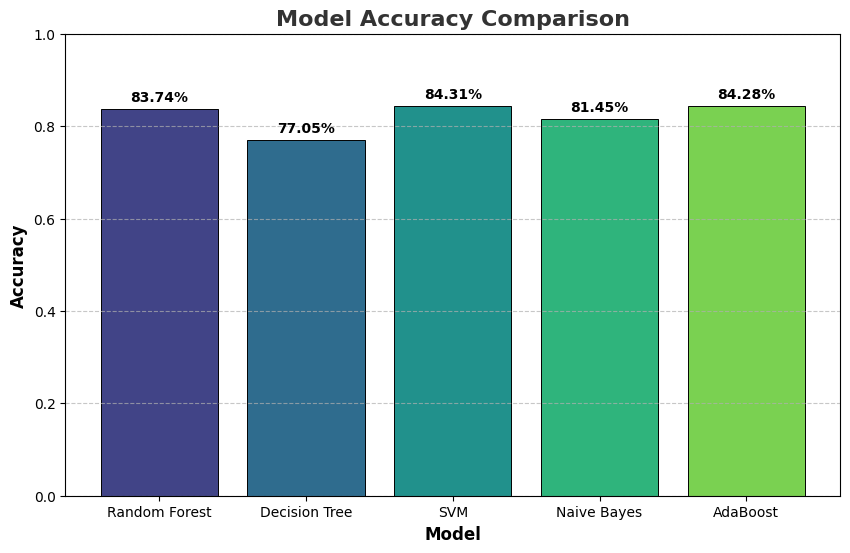

In [20]:
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Random Forest": rf_tomorrow,
    "Decision Tree": decision_tree,
    "SVM": svm_model,
    "Naive Bayes": naive_bayes_model,
    "AdaBoost": adaboost_model
}

accuracy_scores = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_tomorrow, y_pred)
    accuracy_scores[model_name] = accuracy


model_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models)))  

bars = plt.bar(model_names, accuracy_values, color=colors, edgecolor='black', linewidth=0.7)


plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracy_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
        f"{accuracy:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold'
    )


plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()
